In [172]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from scipy import stats

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split as split

from sklearn.linear_model import LinearRegression, Lasso

from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

# Load The Dataset

In [173]:
# Load the dataset and display top three rows
i10 = pd.read_csv('car_age_price.csv')
i10.head(3)

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000


# Data Exploration and Cleaning

In [174]:
# Shape of the dataset
sh = i10.shape
print("Number of Rows:",sh[0])
print("Number of Columns:",sh[1])

Number of Rows: 112
Number of Columns: 2


In [175]:
# Information on the dataset
i10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [176]:
# Statistical setails on our dataset
i10.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [177]:
# Checking for the null/empty values
i10.isnull().sum()

Year     0
Price    0
dtype: int64

In [178]:
# Checking for the NA values
i10.isna().sum()

Year     0
Price    0
dtype: int64

In [179]:
# Assign data values to variables
x = i10['Year']
y = i10['Price']

Text(0.5, 1.0, 'Price Column with Outliers')

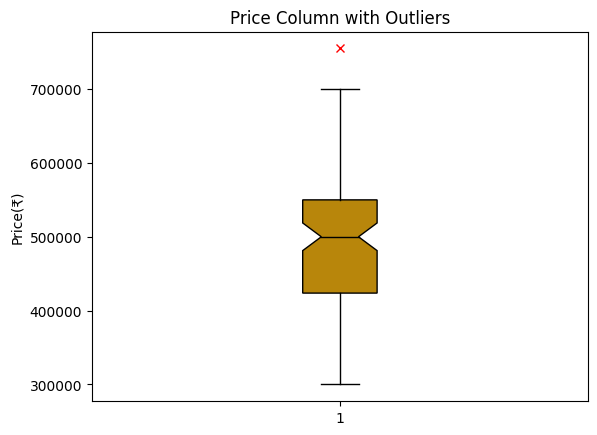

In [180]:
# Checking for the outliers
flier = dict(marker='x',markeredgecolor='r')
box = dict(facecolor='darkgoldenrod')
median = dict(color='k')

plt.boxplot(y,flierprops=flier,boxprops=box,notch=True,patch_artist=True,medianprops=median)
plt.ylabel("Price(₹)")
plt.title("Price Column with Outliers")

In [182]:
# Handling outliers
q1 = np.quantile(y,0.25)
q3 = np.quantile(y,0.75)
iqr = q3-q1
c = 1.5
min, max = [q1-c*iqr,q3+c*iqr]

outlier = i10[(y<min )| (y>max)]

# Removing the outlier
i10 = i10.drop(outlier.index[0])

Text(0.5, 1.0, 'Price Column without Outliers')

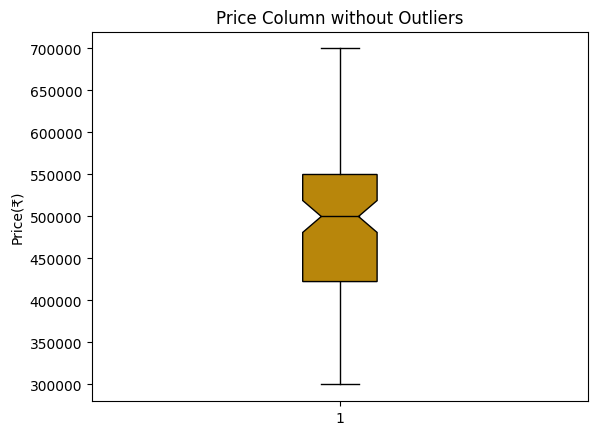

In [183]:
# Checking for Outliers after the clean-up
flier = dict(marker='x',markeredgecolor='r')
box = dict(facecolor='darkgoldenrod')
median = dict(color='k')

plt.boxplot(i10['Price'],flierprops=flier,boxprops=box,notch=True,patch_artist=True,medianprops=median)
plt.ylabel("Price(₹)")
plt.title("Price Column without Outliers")

# Linear Relationship

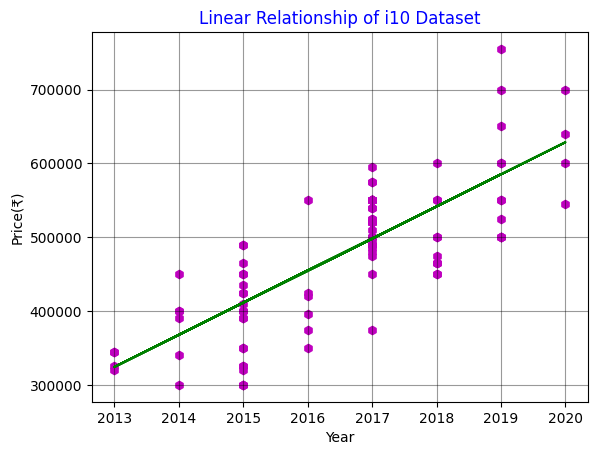

In [184]:
plt.scatter(x,y,c='m',marker='h')
plt.xlabel("Year")
plt.ylabel("Price(₹)")
plt.grid(True,c='k',alpha=0.4)
plt.title("Linear Relationship of i10 Dataset", c='b')

m, c = np.polyfit(x,y,1)

plt.plot(x,m*x+c,c='g')

In [185]:
print("Pearson's r:",round(stats.pearsonr(x,y)[0],2))

Pearson's r: 0.78


The correlation coefiicient r > 0.7, which indicate strong positive correlation. And that also quite evident from our scatterplot

# Predicting The Price in 2022
It is possible to predict future price of second-hand i10 from our plot.

In [186]:
# Predicting future value
# Straigh Line Equation : y = mx + b
# m = slope & c = intercept
print("The price of second-hand i10 car in 2022 would be",round(m*2022+c,2))

The price of second-hand i10 car in 2022 would be 715488.08


# Regression Models

In [190]:
df = i10.copy()
col = df.columns

# Split the dataset into train set and test set
train_df, test_df= split(df,test_size=0.1,random_state= 100)

In [191]:
# Initialize scaling
scale = StandardScaler()

In [192]:
train_df[col] = scale.fit_transform(train_df[col])

train_x  = train_df['Year'].values.reshape(-1,1)
train_y = train_df['Price'].values.reshape(-1,1)

test_df[col] = scale.fit_transform(test_df[col])

test_x = test_df['Year'].values.reshape(-1,1)
test_y = test_df['Price'].values.reshape(-1,1)

## Linear Regression

In [ ]:
# Initialize Linear Regression
LinReg = LinearRegression()

# Fit values into regression model
LinReg.fit(train_x,train_y)

# Make the prediction
pred_y = LinReg.predict(test_x)

In [193]:
# Evaluation
score = LinReg.score(test_x,test_y)*100
print("Accuracy Score (%):",round(score,2))

mae = mean_absolute_error(pred_y,test_y)
print("MAE:",round(mae,2))

mse = mean_squared_error(pred_y,test_y)
print("MSE:",round(mse,2))

Accuracy Score (%): 84.74
MAE: 0.31
MSE: 0.15


## Lasso Regression

In [194]:
# Initialize Linear Regression
LaReg = Lasso(alpha=0.1e-4, random_state=10, selection='cyclic')

# Fit values into regression model
LaReg.fit(train_x,train_y)

# Make the prediction
pred_y = LaReg.predict(test_x)

In [195]:
# Evaluation
score = LaReg.score(test_x,test_y)*100
print("Accuracy Score (%):",round(score,2))

mae = mean_absolute_error(pred_y,test_y)
print("MAE:",round(mae,2))

mse = mean_squared_error(pred_y,test_y)
print("MSE:",round(mse,2))

print("RMSE:",round(np.sqrt(mse),2))

r2 = r2_score(pred_y,test_y)
print("R2:",r2)

Accuracy Score (%): 84.74
MAE: 0.31
MSE: 0.15
RMSE: 0.39
R2: 0.7380246962565096


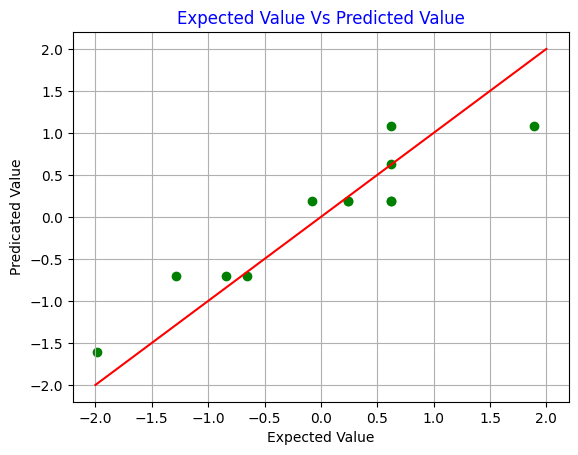

In [196]:
# r = range(300000,600000)
r = [-2,2]
plt.scatter(test_y,pred_y,c='g')
plt.grid(True)
plt.xlabel("Expected Value")
plt.ylabel("Predicated Value")
plt.title("Expected Value Vs Predicted Value",c='b')
plt.plot(r,r,c='r')

After performing both Linear Regression and Lasso Regression, they both gave same result, which is that both model gave **r2** score above *0.7*, which regarded as very good model.